In [1]:
import os
import numpy as np
import cv2
import string

# Create a synthetic dataset
def create_synthetic_dataset(dataset_dir, num_samples=10, img_size=(64, 64)):
    if not os.path.exists(dataset_dir):
        os.makedirs(dataset_dir)
        print(f"Created directory: {dataset_dir}")
    
    for letter in string.ascii_uppercase[:5]:  # Use only first 5 letters for small dataset
        letter_dir = os.path.join(dataset_dir, letter)
        if not os.path.exists(letter_dir):
            os.makedirs(letter_dir)
            print(f"Created directory: {letter_dir}")
        
        for i in range(num_samples):
            img = np.random.randint(0, 256, (img_size[0], img_size[1], 3), dtype=np.uint8)
            cv2.putText(img, letter, (5, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2)
            img_path = os.path.join(letter_dir, f'{i}.png')
            cv2.imwrite(img_path, img)
            print(f"Saved image: {img_path}")

# Path to dataset directory
DATASET_DIR = 'synthetic_dataset'
create_synthetic_dataset(DATASET_DIR)



Saved image: synthetic_dataset\A\0.png
Saved image: synthetic_dataset\A\1.png
Saved image: synthetic_dataset\A\2.png
Saved image: synthetic_dataset\A\3.png
Saved image: synthetic_dataset\A\4.png
Saved image: synthetic_dataset\A\5.png
Saved image: synthetic_dataset\A\6.png
Saved image: synthetic_dataset\A\7.png
Saved image: synthetic_dataset\A\8.png
Saved image: synthetic_dataset\A\9.png
Saved image: synthetic_dataset\B\0.png
Saved image: synthetic_dataset\B\1.png
Saved image: synthetic_dataset\B\2.png
Saved image: synthetic_dataset\B\3.png
Saved image: synthetic_dataset\B\4.png
Saved image: synthetic_dataset\B\5.png
Saved image: synthetic_dataset\B\6.png
Saved image: synthetic_dataset\B\7.png
Saved image: synthetic_dataset\B\8.png
Saved image: synthetic_dataset\B\9.png
Saved image: synthetic_dataset\C\0.png
Saved image: synthetic_dataset\C\1.png
Saved image: synthetic_dataset\C\2.png
Saved image: synthetic_dataset\C\3.png
Saved image: synthetic_dataset\C\4.png
Saved image: synthetic_da

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Constants
DATASET_DIR = 'synthetic_dataset'
IMG_SIZE = 64  # Standard image size
NUM_CLASSES = 5  # Number of classes (A, B, C, D, E)

def load_dataset():
    images = []
    labels = []
    
    for label in os.listdir(DATASET_DIR):
        label_dir = os.path.join(DATASET_DIR, label)
        for img_name in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_name)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            images.append(image)
            labels.append(ord(label) - ord('A'))  # Convert label to index (A->0, B->1, ..., E->4)
    
    images = np.array(images) / 255.0  # Normalize images
    labels = to_categorical(labels, NUM_CLASSES)  # One-hot encode labels
    return images, labels

# Load dataset
images, labels = load_dataset()

# Split data
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)


C:\Users\Santosh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 539ms/step - accuracy: 0.1896 - loss: 1.6649 - val_accuracy: 0.0000e+00 - val_loss: 1.7408
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.2604 - loss: 1.5617 - val_accuracy: 0.2000 - val_loss: 1.6536
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.4875 - loss: 1.5653 - val_accuracy: 0.2000 - val_loss: 1.6160
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.7125 - loss: 1.5446 - val_accuracy: 0.1000 - val_loss: 1.6494
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4188 - loss: 1.5078 - val_accuracy: 0.0000e+00 - val_loss: 1.7615
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.2604 - loss: 1.4693 - val_accuracy: 0.2000 - val_loss: 1.6449
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4354 - loss: 1.4134 - val_accuracy: 0.2000 - val_loss: 1.4898
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5604 - loss: 1.3244 - val_accuracy: 0.4000 - val_lo

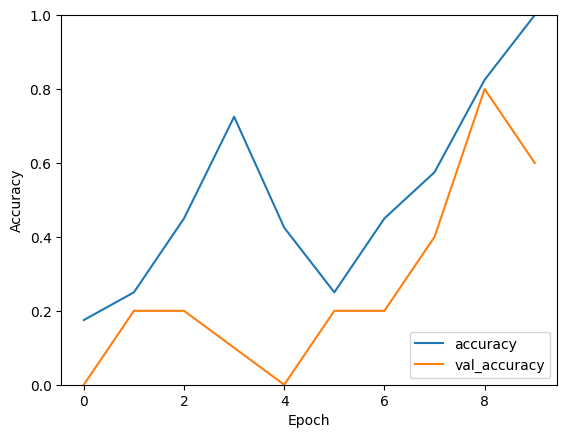

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Save the model
model.save('sign_language_model.h5')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
import tensorflow as tf
import cv2
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('sign_language_model.h5')

# Function to preprocess image for prediction
def preprocess_image(image):
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# OpenCV setup for real-time video capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess frame for prediction
    preprocessed_frame = preprocess_image(frame)
    
    # Predict gesture
    predictions = model.predict(preprocessed_frame)
    predicted_label = np.argmax(predictions)

    # Display the prediction
    cv2.putText(frame, f'Predicted: {chr(predicted_label + ord("A"))}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Sign Language Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━